# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [2]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

39209


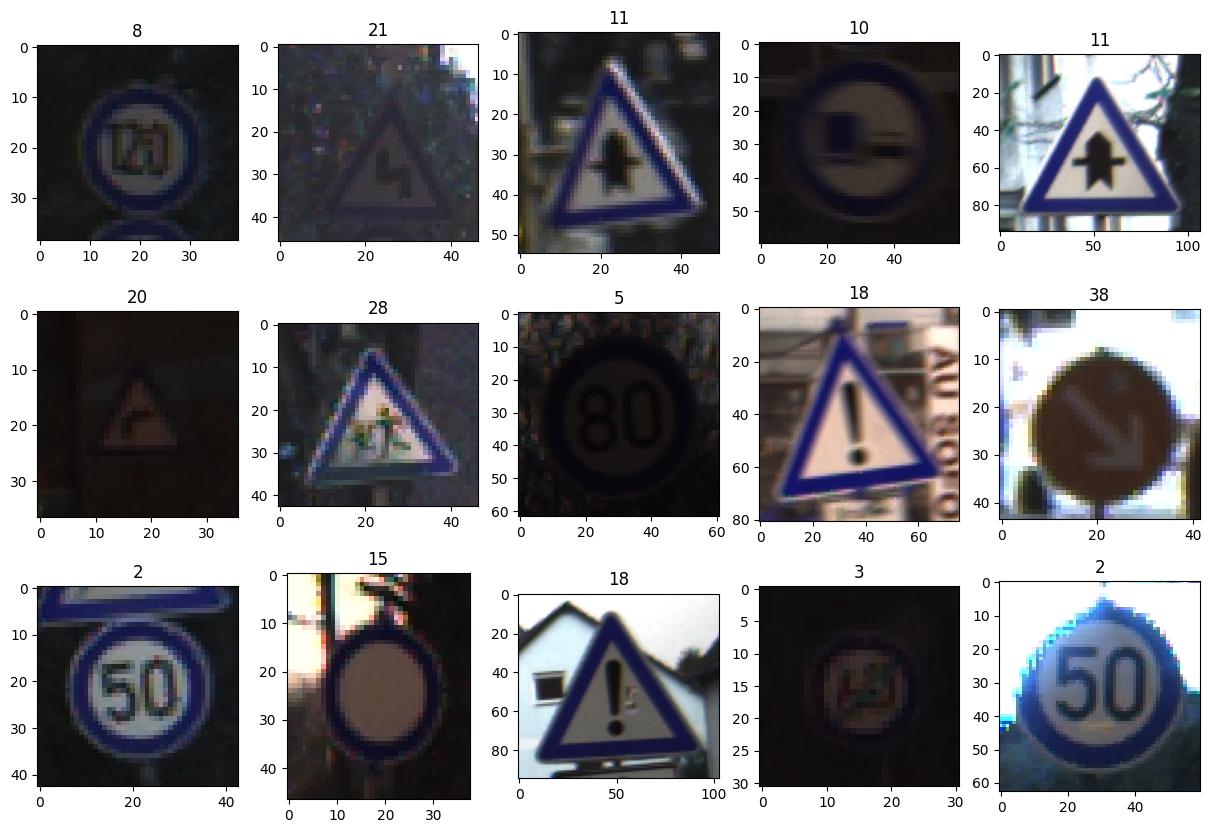

In [54]:
# Load the training labels
root = 'data/archive' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)
print(num_samples)


# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [11]:
# Extract class identifiers
# Hint: Check the csv 
ids = data["ClassId"]

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

2250
210


(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

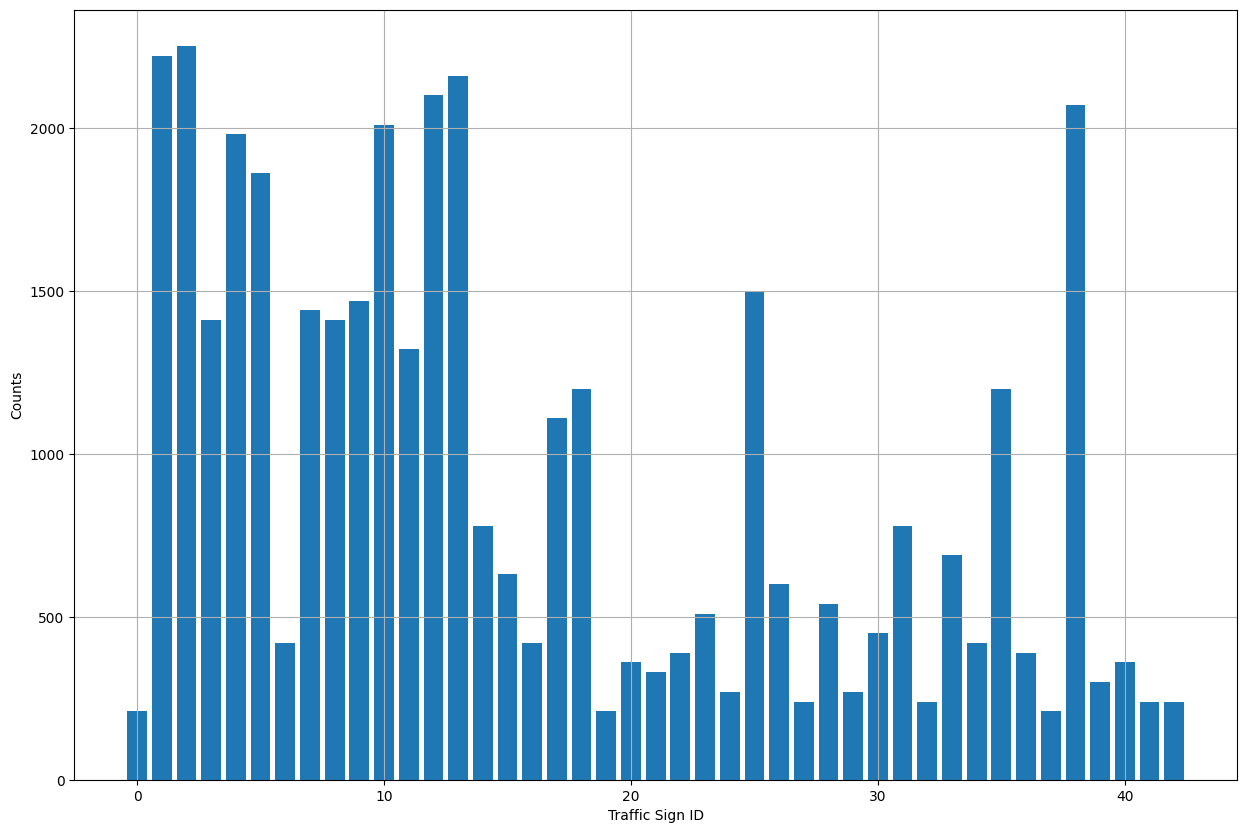

In [21]:
from collections import Counter
hist = Counter(ids)
print(max(hist.values()))
print(min(hist.values()))
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

## Answers:
Clearly, the dataset is not completely balanced. The ratio between most and least represented class is more than 10, leading to significant biases.
But it is also not the worst, meaning there is no class that is completely underrepresented.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

The Train.csv contains width and height, together with ROI coordinates. I am interested in both distribution of resolution of the whole image, as well as ROI only.

Lets check first width and height separately


Average width = 50.83587951745773
Min width  = 25
Max width  = 243


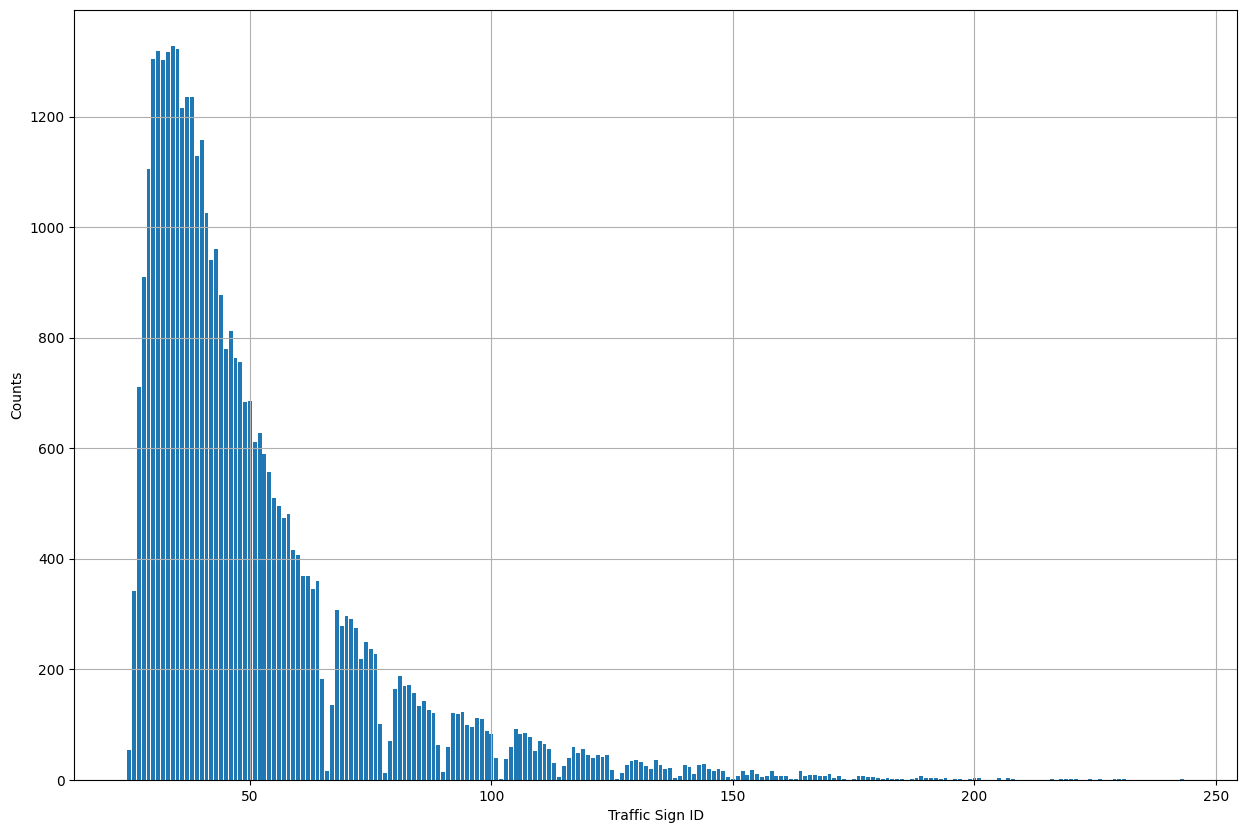

In [29]:
hist = Counter(data["Width"])
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')
print(f"Average width = {data["Width"].mean()}") 
print(f"Min width  = {data["Width"].min()}") 
print(f"Max width  = {data["Width"].max()}") 

Average height = 50.328929582493814
Min height  = 25
Max height  = 225


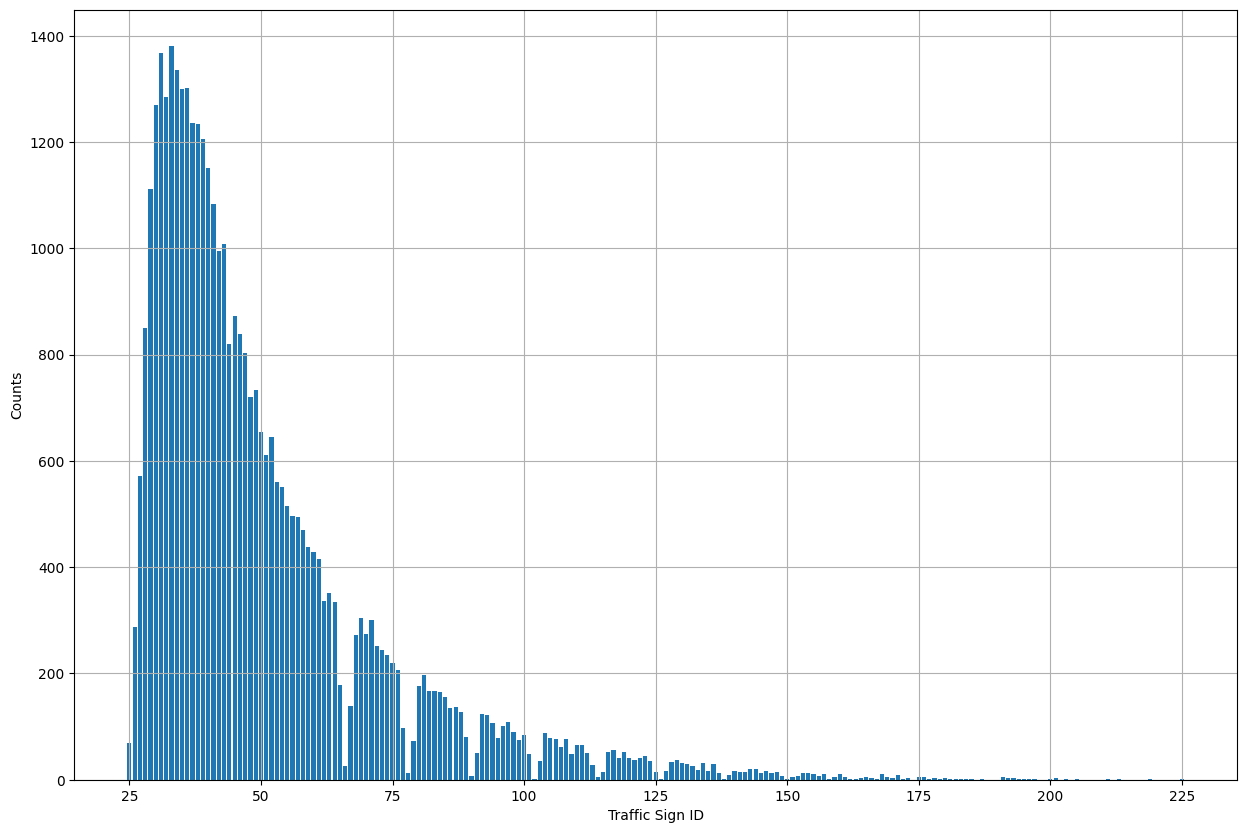

In [30]:
hist = Counter(data["Height"])
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')
print(f"Average height = {data["Height"].mean()}")  
print(f"Min height  = {data["Height"].min()}") 
print(f"Max height  = {data["Height"].max()}") 

Both width and height lie in between 25 and 243, in both cases with majority between 27 and 60.

I am curious also about the ration (whether there are some elongated images).

(array([1.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 1.600e+01, 4.000e+00,
        4.000e+00, 6.000e+00, 2.000e+00, 7.000e+00, 4.000e+00, 6.000e+00,
        1.900e+01, 3.900e+01, 1.800e+01, 1.600e+01, 2.800e+01, 2.400e+01,
        4.600e+01, 7.300e+01, 7.100e+01, 1.280e+02, 2.180e+02, 2.840e+02,
        3.950e+02, 7.490e+02, 1.550e+03, 2.723e+03, 5.654e+03, 2.604e+03,
        9.626e+03, 5.001e+03, 2.169e+03, 2.245e+03, 1.791e+03, 1.547e+03,
        1.061e+03, 5.640e+02, 2.390e+02, 1.150e+02, 6.200e+01, 3.300e+01,
        2.000e+01, 1.100e+01, 1.000e+01, 7.000e+00, 7.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00]),
 array([0.36813187, 0.3891254 , 0.41011892, 0.43111245, 0.45210598,
        0.4730995 , 0.49409303, 0.51508656, 0.53608008, 0.55707361,
        0.57806714, 0.59906067, 0.62005419, 0.64104772, 0.66204125,
        0.68303477, 0.7040283 , 0.72502183, 0.74601535, 0.76700888,
        0.78800241, 0.80899594, 0.82998946, 0.85098299, 0.87197652,
        0.89297004, 0.91396357, 0.93

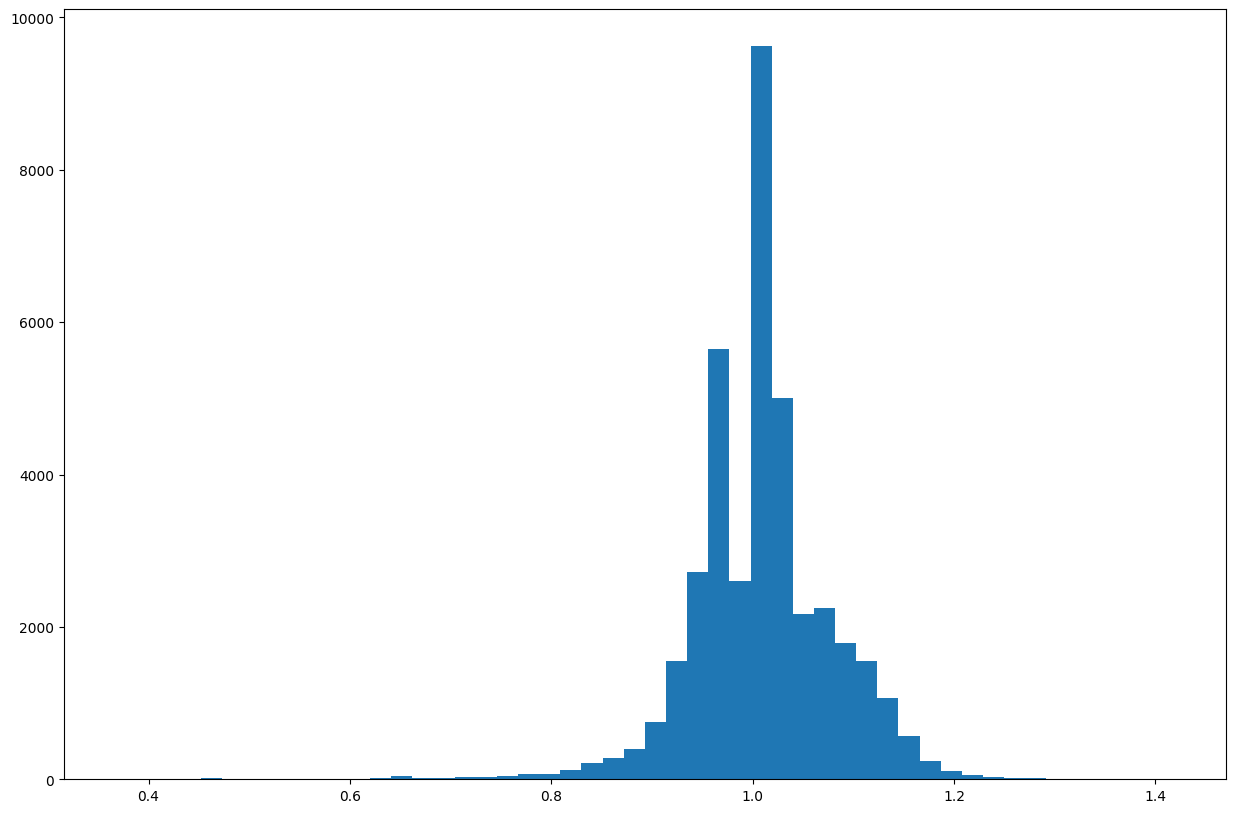

In [32]:
ratio = data["Width"]/data["Height"]
plt.hist(ratio, bins = 50)

No crazy ratios, all the images are "squarish".

now lets see about ROI

In [34]:
roi_width = data["Roi.X2"] - data["Roi.X1"]
roi_height = data["Roi.Y2"] - data["Roi.Y1"]

Average roi width = 39.197786222550945
Min roi width  = 15
Max roi width  = 203


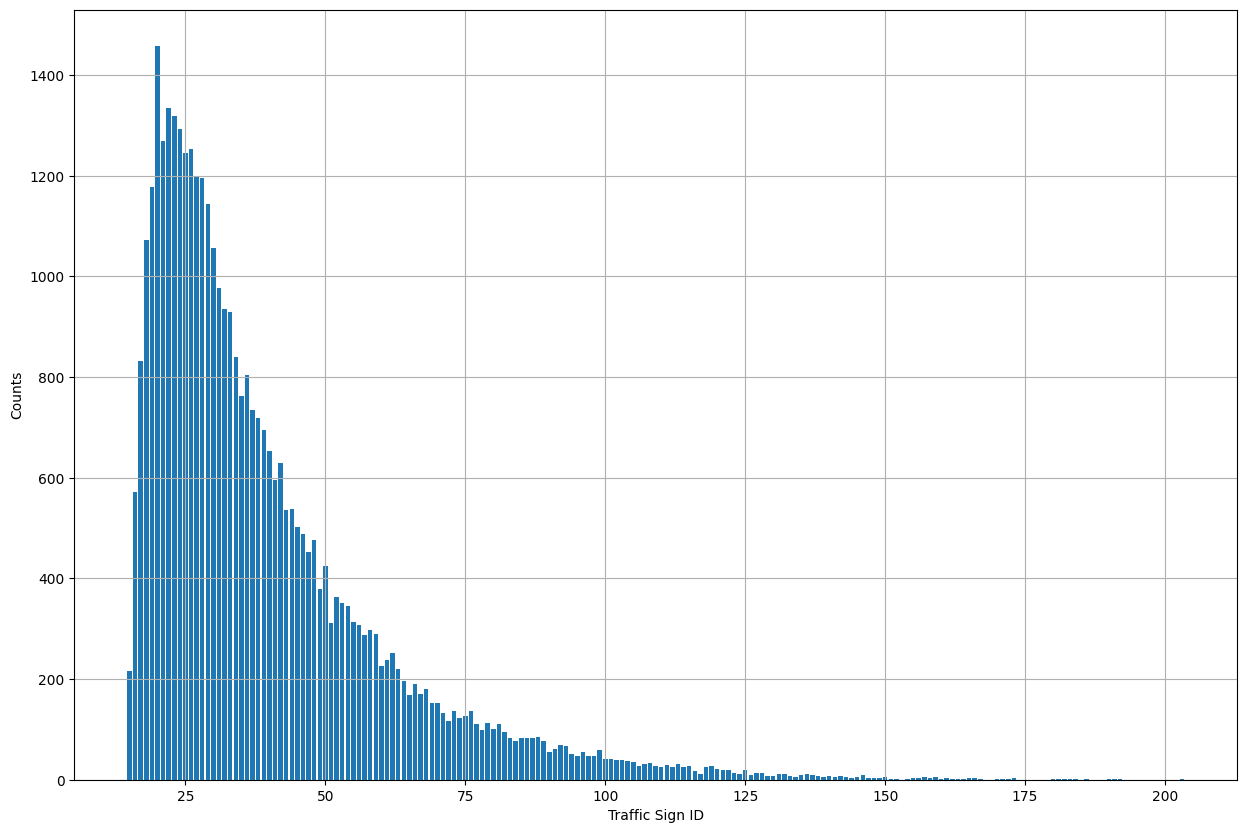

In [35]:
hist = Counter(roi_width)
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')
print(f"Average roi width = {roi_width.mean()}") 
print(f"Min roi width  = {roi_width.min()}") 
print(f"Max roi width  = {roi_width.max()}") 

Average roi width = 38.76599760259124
Min roi width  = 15
Max roi width  = 185


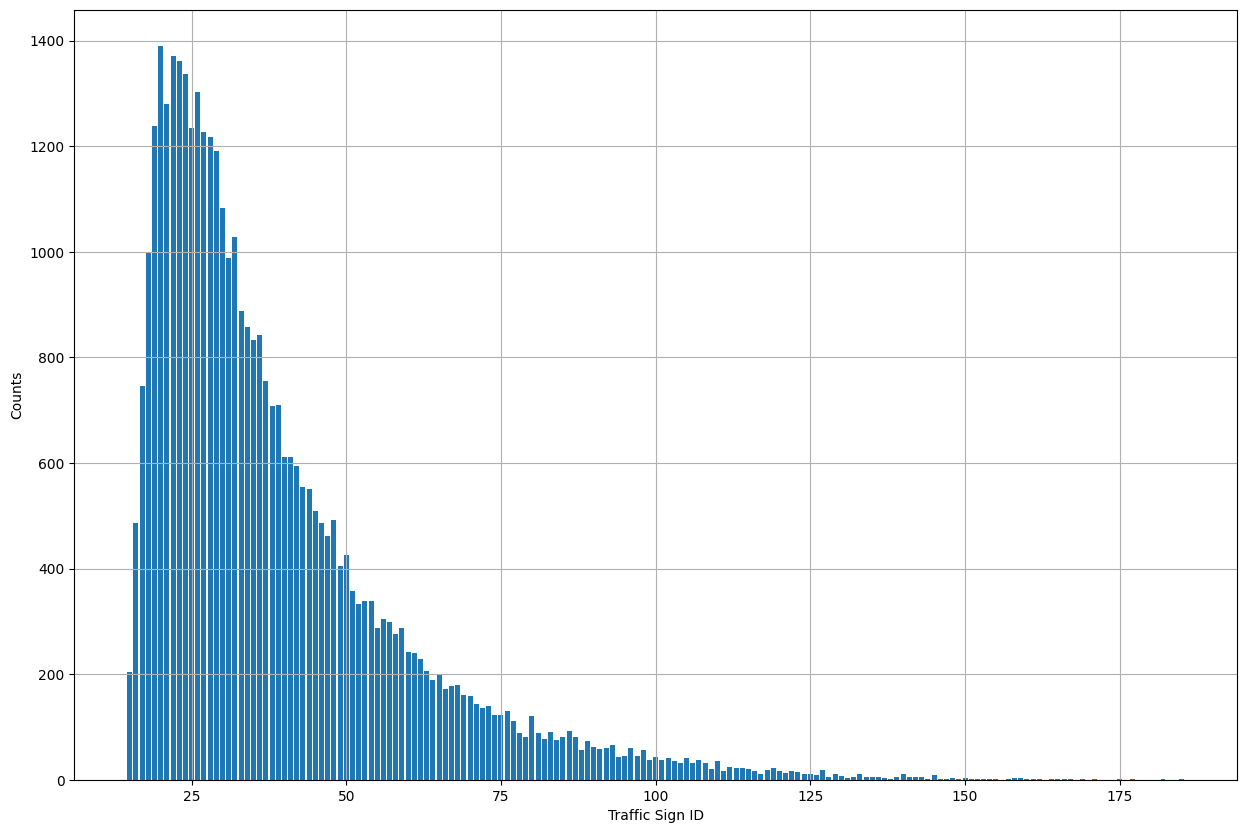

In [38]:
hist = Counter(roi_height)
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')
print(f"Average roi width = {roi_height.mean()}") 
print(f"Min roi width  = {roi_height.min()}") 
print(f"Max roi width  = {roi_height.max()}") 

So ROIs are similarly distributed as width and height (only slightly smaller, indicating that in most cases the sign takes up almost the whole picture)

Now lets have a look how it corresponds to the classes (as the ratio is close to one for all images, I will be always using width only)

<Axes: ylabel='ClassId'>

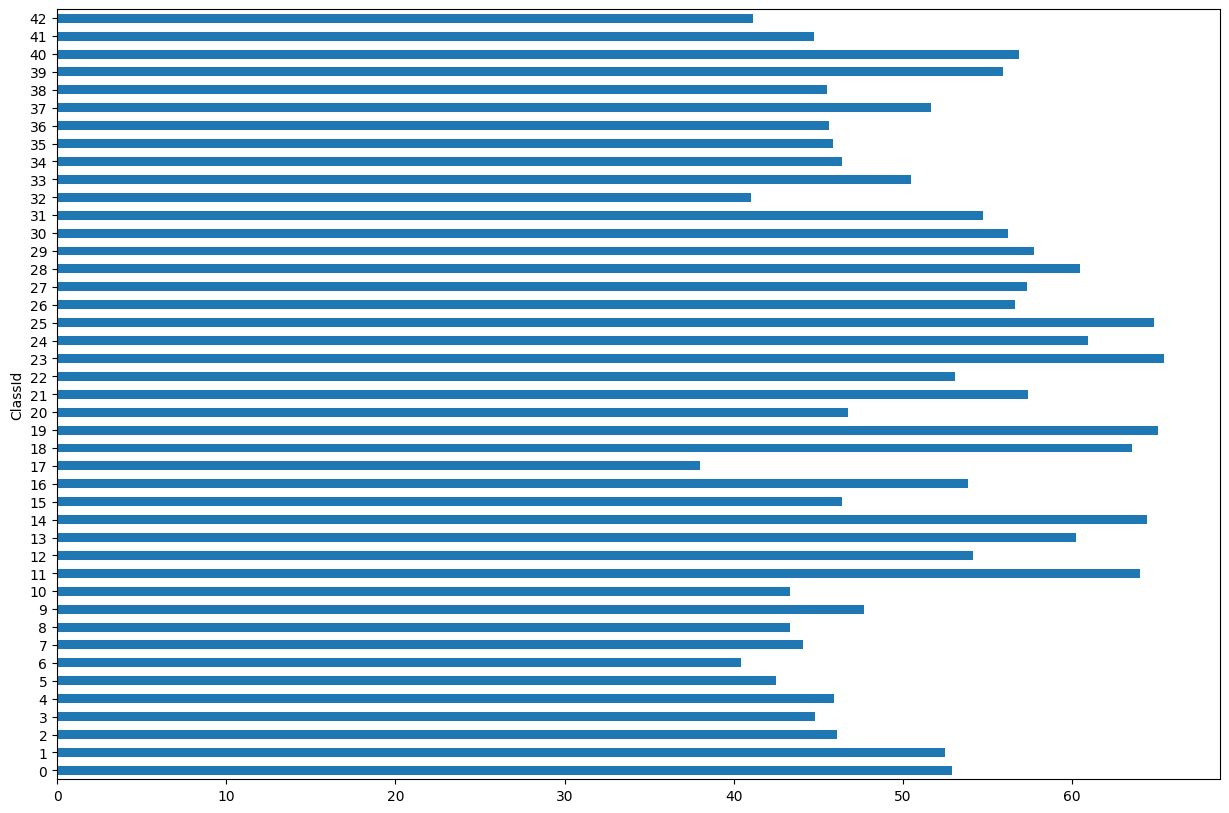

In [51]:
# Step 1: Calculate the average width for each ID
data.groupby('ClassId')['Width'].mean().plot.barh()




There are outliers, bu mostly ok distributed